<a href="https://colab.research.google.com/github/olloz8/BigData2024/blob/main/Income_Group_Birth_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#깃허브 연동
!git clone https://github.com/olloz8/BigData2024.git

In [3]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

!apt-get -qq -y install fonts-nanum > /dev/null

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

fe = fm.FontEntry(
    fname=fontpath,
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

In [ ]:
import os
os.kill(os.getpid(), 9)

            소득구간별(1)    2022 2022.1 2022.2 2022.3 2022.4 2022.5       2022.6
0           소득구간별(1)  합계 (%)   자녀없음   자녀있음   자녀있음   자녀있음   자녀있음  평균 출생아수 (명)
1           소득구간별(1)      소계     소계     소계     1명     2명   3명이상           소계
2                 합계   100.0   42.5   57.5   39.7   15.1    2.7         0.79
3          1,000만원미만   100.0   33.9   66.1   35.4   23.0    7.8         1.08
4   1,000~3,000만원 미만   100.0   36.7   63.3   39.6   19.3    4.4         0.93
5   3,000~5,000만원 미만   100.0   37.4   62.6   43.5   16.3    2.7         0.85
6   5,000~7,000만원 미만   100.0   42.7   57.3   41.1   14.3    1.8         0.75
7  7,000~10,000만원 미만   100.0   50.7   49.3   37.1   10.9    1.3         0.63
8         10,000만원이상   100.0   49.1   50.9   38.8   10.9    1.2         0.64
              소득구간     합계  자녀없음  자녀있음_소계  자녀1명  자녀2명  자녀3명이상  평균_출생아수
2               합계  100.0  42.5     57.5  39.7  15.1     2.7     0.79
3          1,000미만  100.0  33.9     66.1  35.4  23.0     7.8     1.08
4   1,000~3,000 미만  

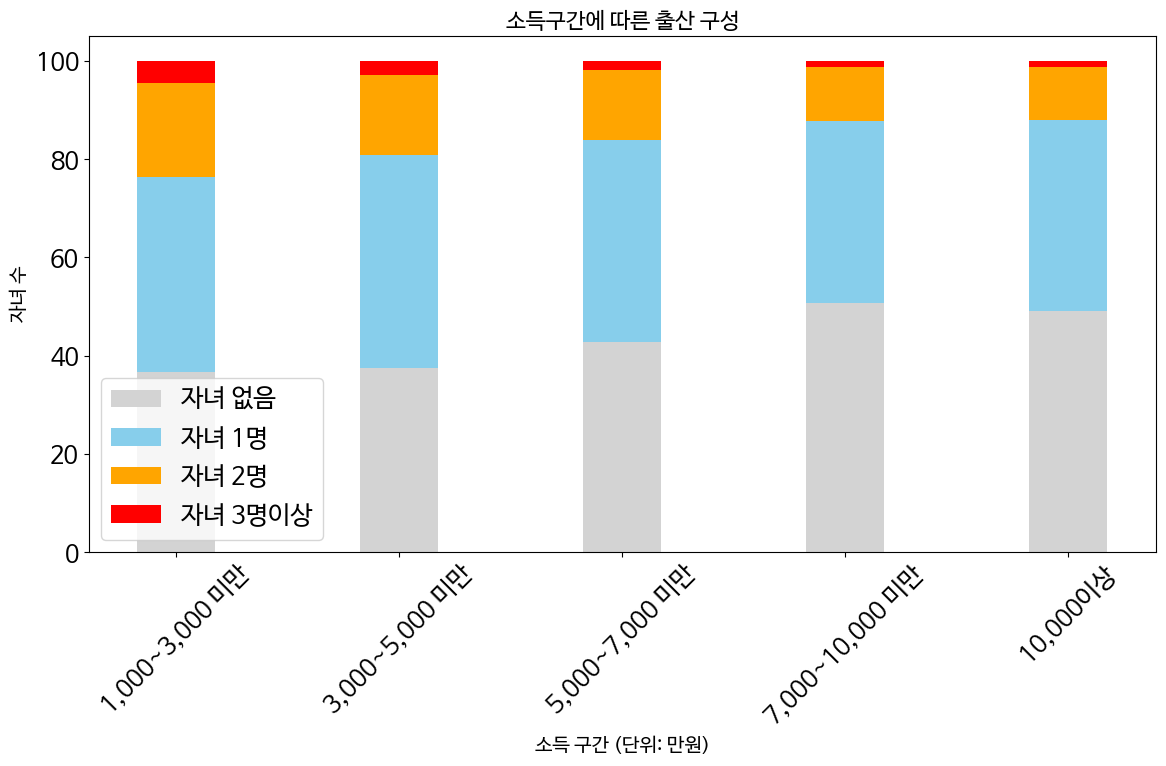

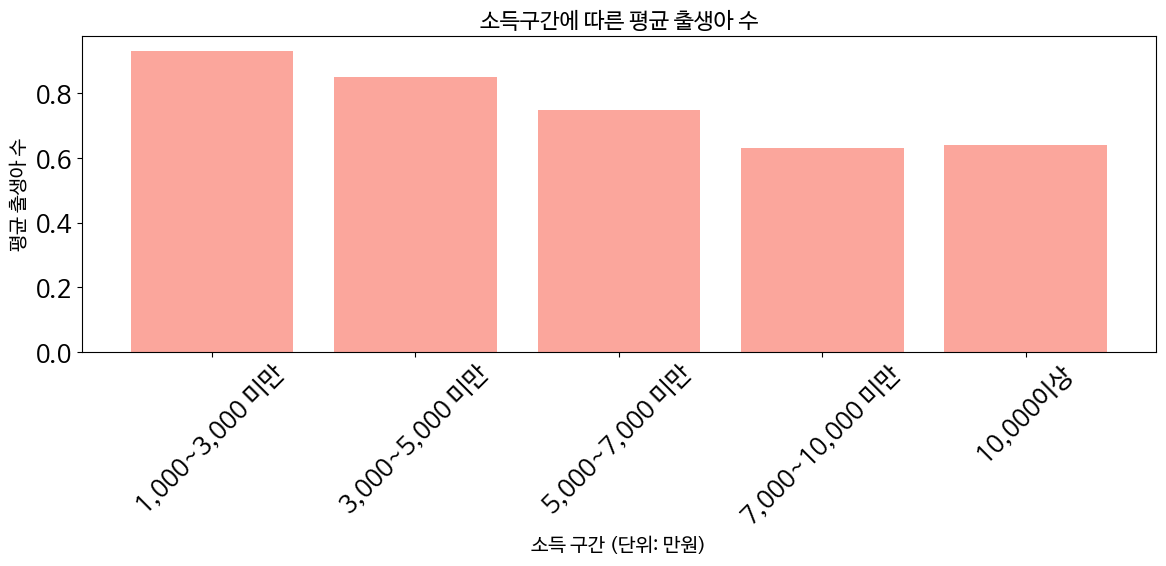

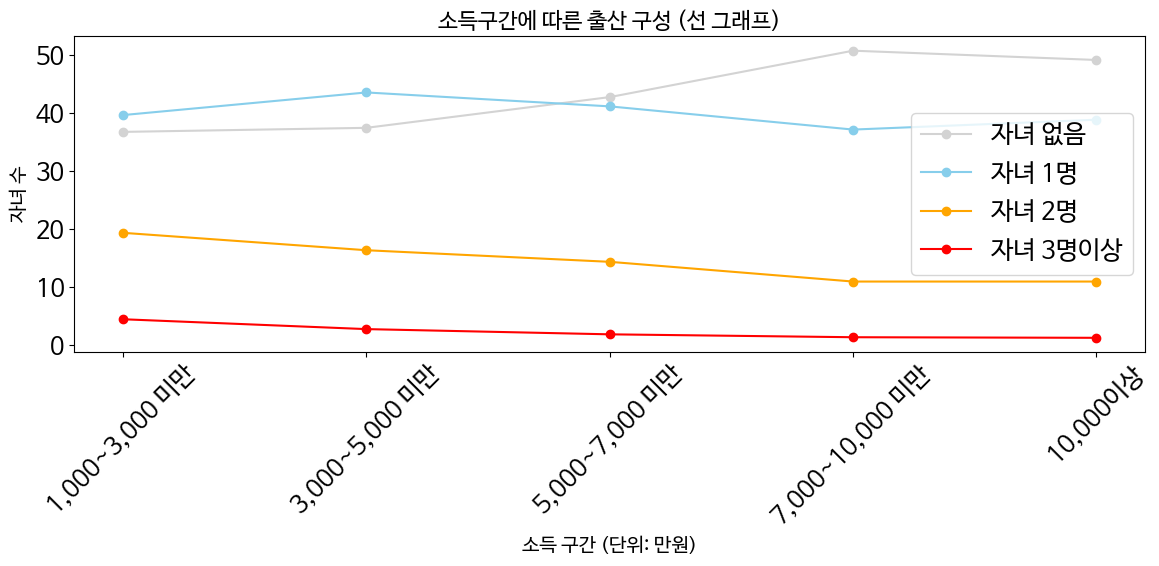

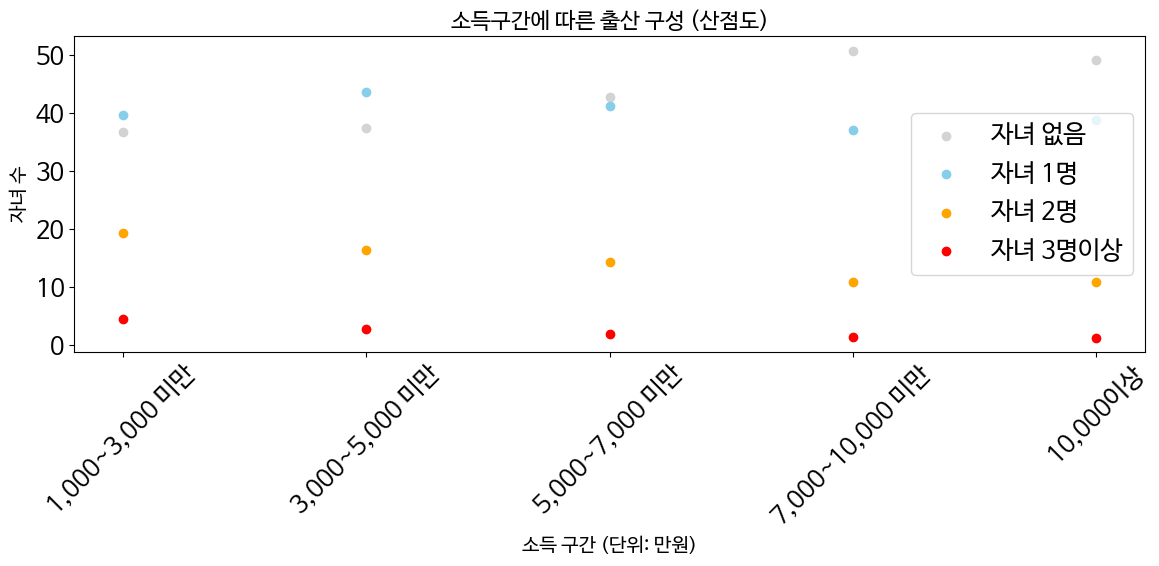

기초 통계 정보:
           합계       자녀없음    자녀있음_소계       자녀1명       자녀2명    자녀3명이상   평균_출생아수
count    7.0   7.000000   7.000000   7.000000   7.000000  7.000000  7.000000
mean   100.0  41.857143  58.142857  39.314286  15.685714  3.128571  0.810000
std      0.0   6.345039   6.345039   2.627691   4.378138  2.332177  0.160312
min    100.0  33.900000  49.300000  35.400000  10.900000  1.200000  0.630000
25%    100.0  37.050000  54.100000  37.950000  12.600000  1.550000  0.695000
50%    100.0  42.500000  57.500000  39.600000  15.100000  2.700000  0.790000
75%    100.0  45.900000  62.950000  40.400000  17.800000  3.550000  0.890000
max    100.0  50.700000  66.100000  43.500000  23.000000  7.800000  1.080000

중앙값:
 합계         100.00
자녀없음        42.50
자녀있음_소계     57.50
자녀1명        39.60
자녀2명        15.10
자녀3명이상       2.70
평균_출생아수      0.79
dtype: float64

분산:
 합계          0.000000
자녀없음       40.259524
자녀있음_소계    40.259524
자녀1명        6.904762
자녀2명       19.168095
자녀3명이상      5.439048
평균_출생아수     0.02

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import statsmodels.api as sm

# 한글 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False

fe = fm.FontEntry(
    fname='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic'
)
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

# CSV 파일 읽기
df = pd.read_csv('birthrate.csv', encoding='utf-8')
print(df)
print("====================================================================")

# 첫 두 행 제거
df = df.drop(index=[0, 1])

# 열 이름 재설정
df.columns = ['소득구간', '합계', '자녀없음', '자녀있음_소계', '자녀1명', '자녀2명', '자녀3명이상', '평균_출생아수']

# 소득 구간에서 "만원" 제거
df['소득구간'] = df['소득구간'].str.replace('만원', '', regex=False).str.strip()

# 데이터 타입 변환
numeric_columns = ['합계', '자녀없음', '자녀있음_소계', '자녀1명', '자녀2명', '자녀3명이상', '평균_출생아수']
df[numeric_columns] = df[numeric_columns].astype(float)

print(df)

# 데이터 준비
x_labels = df['소득구간'][2:]
children_none = df['자녀없음'][2:].to_numpy()
children_1 = df['자녀1명'][2:].to_numpy()
children_2 = df['자녀2명'][2:].to_numpy()
children_3_plus = df['자녀3명이상'][2:].to_numpy()

# 막대 그래프 설정 (그래프 크기 조정)
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = range(len(x_labels))

# 누적 막대 그래프 그리기
plt.bar(x, children_none, width=bar_width, label='자녀 없음', color='lightgray')
plt.bar(x, children_1, width=bar_width, bottom=children_none, label='자녀 1명', color='skyblue')
plt.bar(x, children_2, width=bar_width, bottom=children_none + children_1, label='자녀 2명', color='orange')
plt.bar(x, children_3_plus, width=bar_width, bottom=children_none + children_1 + children_2, label='자녀 3명이상', color='red')

# 그래프 제목 및 레이블 설정
plt.title('소득구간에 따른 출산 구성', fontsize=16)
plt.xlabel('소득 구간 (단위: 만원)', fontsize=14)
plt.ylabel('자녀 수', fontsize=14)
plt.xticks(x, x_labels, rotation=45)

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

# 데이터 준비
x_labels = df['소득구간'][2:]
average_births = df['평균_출생아수'][2:].to_numpy()

# 평균 출생아 수 그래프 설정
plt.figure(figsize=(12, 6))

# 바 차트로 평균 출생아 수 시각화
plt.bar(x_labels, average_births, color='salmon', alpha=0.7)

# 그래프 제목 및 레이블 설정
plt.title('소득구간에 따른 평균 출생아 수', fontsize=16)
plt.xlabel('소득 구간 (단위: 만원)', fontsize=14)
plt.ylabel('평균 출생아 수', fontsize=14)

# 그래프 표시
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 선 그래프 설정
plt.figure(figsize=(12, 6))

# 각 자녀 수에 대한 선 그래프 그리기
plt.plot(x_labels, children_none, label='자녀 없음', marker='o', color='lightgray')
plt.plot(x_labels, children_1, label='자녀 1명', marker='o', color='skyblue')
plt.plot(x_labels, children_2, label='자녀 2명', marker='o', color='orange')
plt.plot(x_labels, children_3_plus, label='자녀 3명이상', marker='o', color='red')

# 그래프 제목 및 레이블 설정
plt.title('소득구간에 따른 출산 구성 (선 그래프)', fontsize=16)
plt.xlabel('소득 구간 (단위: 만원)', fontsize=14)
plt.ylabel('자녀 수', fontsize=14)
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

# 산점도 설정
plt.figure(figsize=(12, 6))

# 각 자녀 수에 대한 산점도 그리기
plt.scatter(x_labels, children_none, label='자녀 없음', color='lightgray')
plt.scatter(x_labels, children_1, label='자녀 1명', color='skyblue')
plt.scatter(x_labels, children_2, label='자녀 2명', color='orange')
plt.scatter(x_labels, children_3_plus, label='자녀 3명이상', color='red')

# 그래프 제목 및 레이블 설정
plt.title('소득구간에 따른 출산 구성 (산점도)', fontsize=16)
plt.xlabel('소득 구간 (단위: 만원)', fontsize=14)
plt.ylabel('자녀 수', fontsize=14)
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

# 기초 통계 분석
statistics = df[numeric_columns].describe()
median = df[numeric_columns].median()
variance = df[numeric_columns].var()

print("기초 통계 정보:\n", statistics)
print("\n중앙값:\n", median)
print("\n분산:\n", variance)

# 상관 분석
correlation = df[numeric_columns].corr()
print("\n상관관계:\n", correlation)

# 회귀 분석
X = df[numeric_columns].drop(columns=['평균_출생아수'])
y = df['평균_출생아수']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# 회귀 결과 요약
print(model.summary())
